In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

## restoring dataframes variable
%store -r 
# for dict dataframes which has data for all sensors for past 30 days
from sys import getsizeof
getsizeof(dataframes)

%config InlineBackend.figure_format = 'retina'

In [3]:
sensors = list(dataframes.keys())

Index(['Unnamed: 0', 'time', 'deployment_id', 'error_flag', 'batt_v',
       'gw_1_id', 'dist_mm', 'f_cnt', 'gw_1_rssi_dbm', 'gw_1_snr_db', 'times',
       'date'],
      dtype='object')


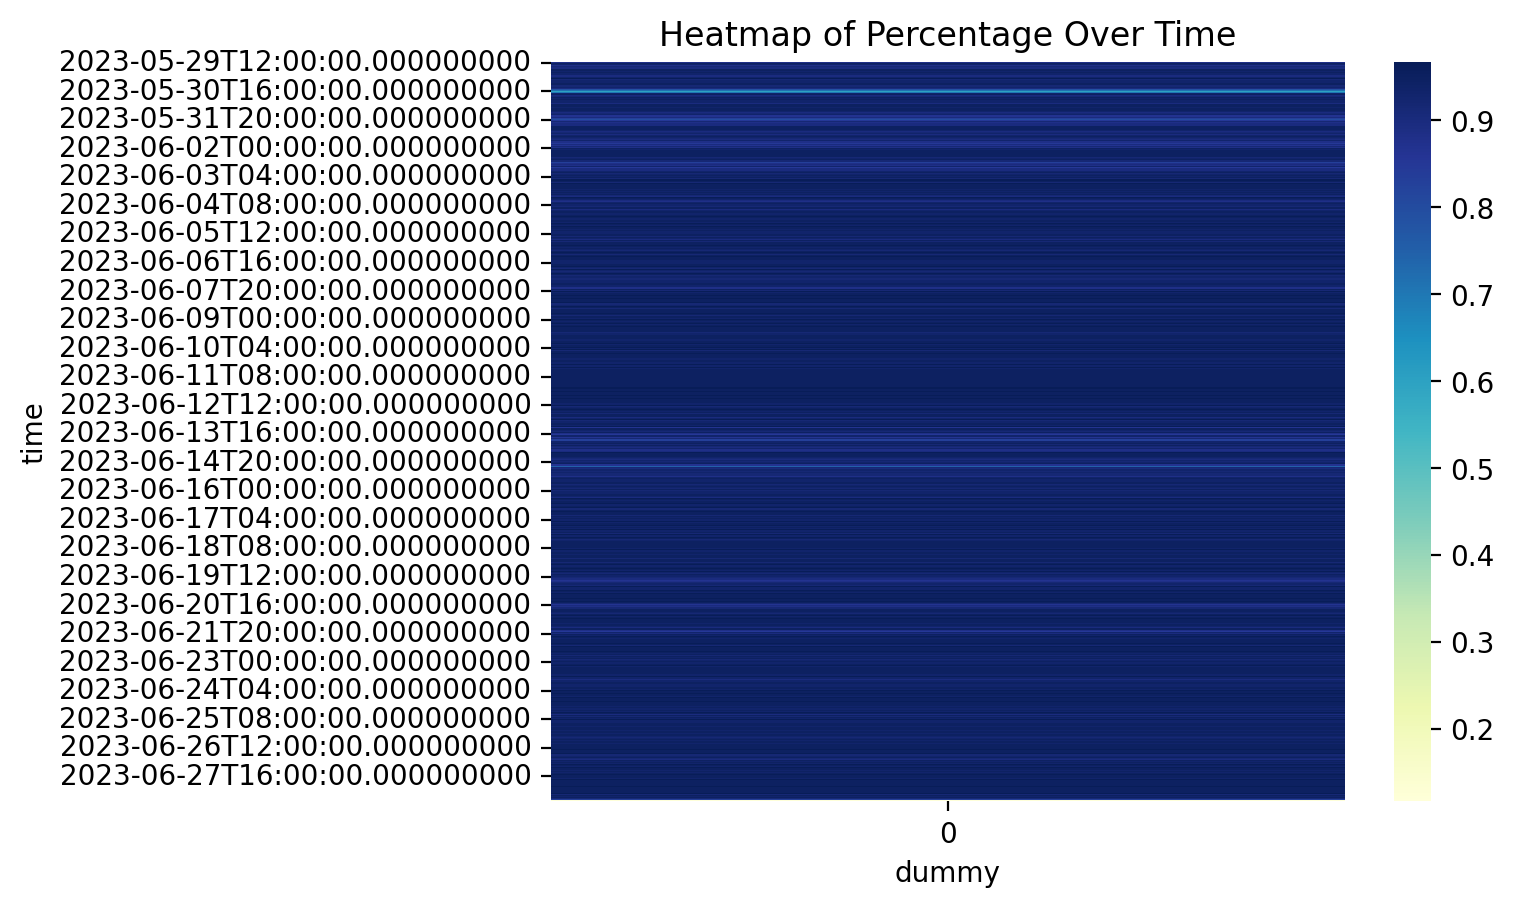

Index(['Unnamed: 0', 'time', 'deployment_id', 'error_flag', 'batt_v',
       'gw_1_id', 'dist_mm', 'f_cnt', 'gw_1_rssi_dbm', 'gw_1_snr_db', 'times',
       'date'],
      dtype='object')


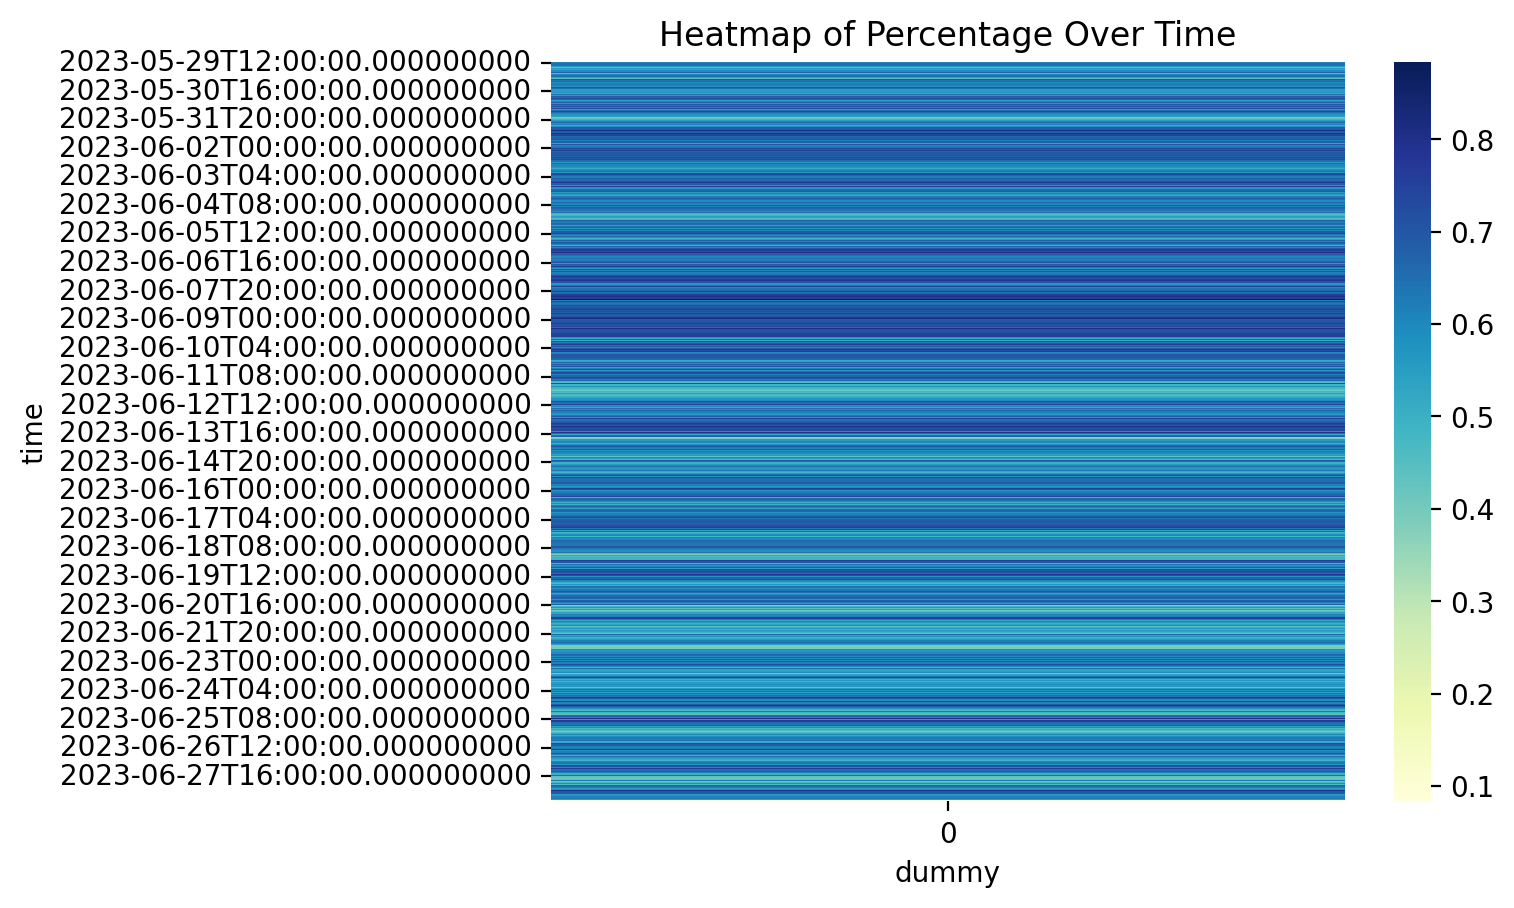

Index(['Unnamed: 0', 'time', 'deployment_id', 'error_flag', 'batt_v',
       'gw_1_id', 'dist_mm', 'f_cnt', 'gw_1_rssi_dbm', 'gw_1_snr_db', 'times',
       'date'],
      dtype='object')


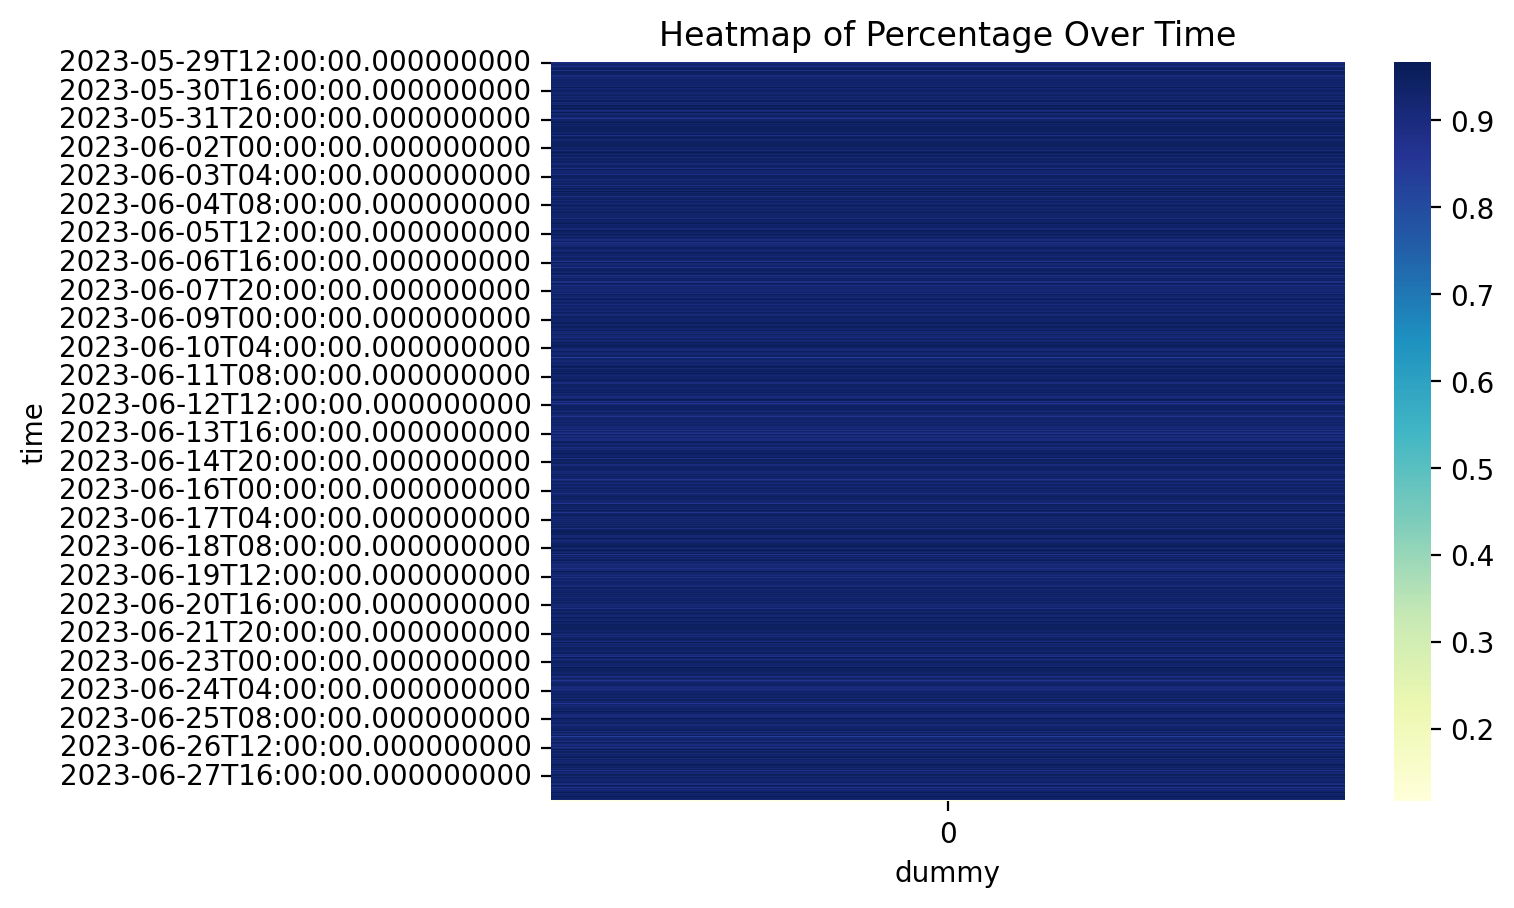

In [12]:
interval_hour = 1
i = 0

for sensor in sensors[:3]:
    data = dataframes[sensor]
    print(data.columns)
    data['time'] = pd.to_datetime(data['time'])
    
    hourly_average = (data.set_index('time')['batt_v'].resample('1H').count())/60
    
    
    df = hourly_average.to_frame()
    df = df.rename(columns={'batt_v': 'hourly_data_retrival_percentage'})
    
    # the code above gives a dataframe that has only hourly_data_retrival_percentage as the column but we need time as well so the code below handles that
    df.reset_index(inplace=True) 
    
    df['dummy'] = 0
    
    pivot_table = df.pivot(index='time', columns='dummy', values='hourly_data_retrival_percentage')
    
    sns.heatmap(pivot_table, cmap='YlGnBu', cbar=True)
    plt.xticks(rotation=0)
    plt.title('Heatmap of Percentage Over Time')
    plt.show()

    


In [12]:
df
df.reset_index(inplace=True)

print(df)

                         time    batt_v
0   2023-05-29 12:00:00+00:00  0.883333
1   2023-05-29 13:00:00+00:00  0.950000
2   2023-05-29 14:00:00+00:00  0.933333
3   2023-05-29 15:00:00+00:00  0.883333
4   2023-05-29 16:00:00+00:00  0.916667
..                        ...       ...
720 2023-06-28 12:00:00+00:00  0.933333
721 2023-06-28 13:00:00+00:00  0.950000
722 2023-06-28 14:00:00+00:00  0.916667
723 2023-06-28 15:00:00+00:00  0.833333
724 2023-06-28 16:00:00+00:00  0.116667

[725 rows x 2 columns]


In [13]:
df.columns

Index(['time', 'batt_v'], dtype='object')

In [7]:
data.columns

Index(['Unnamed: 0', 'time', 'deployment_id', 'error_flag', 'batt_v',
       'gw_1_id', 'dist_mm', 'f_cnt', 'gw_1_rssi_dbm', 'gw_1_snr_db', 'times',
       'date'],
      dtype='object')

In [8]:
data

,Unnamed: 0,time,deployment_id,error_flag,batt_v,gw_1_id,dist_mm,f_cnt,gw_1_rssi_dbm,gw_1_snr_db,times,date
0,0,2023-05-29 12:04:44.737000+00:00,light_maroon_penguin,0,4.024,kona-mega,2572,110603,-109.0,-3.20,12:04:44.737000,2023-05-29
1,1,2023-05-29 12:05:47.885000+00:00,light_maroon_penguin,0,4.024,floodnet-ltap-gw-313330372b007400,2573,110604,-109.0,4.00,12:05:47.885000,2023-05-29
2,2,2023-05-29 12:06:50.945000+00:00,light_maroon_penguin,0,4.024,floodnet-ltap-gw-313330372b007400,2573,110605,-109.0,4.75,12:06:50.945000,2023-05-29
3,3,2023-05-29 12:07:53.592000+00:00,light_maroon_penguin,0,4.026,floodnet-ltap-gw-553232201d003500,2571,110606,-103.0,-0.75,12:07:53.592000,2023-05-29
4,4,2023-05-29 12:08:57.175000+00:00,light_maroon_penguin,0,4.026,floodnet-ltap-gw-313330372b007400,2567,110607,-109.0,4.25,12:08:57.175000,2023-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...
40642,40642,2023-06-28 16:02:49.952000+00:00,light_maroon_penguin,0,4.046,floodnet-ltap-gw-313330372b007400,2637,152034,-114.0,-1.25,16:02:49.952000,2023-06-28
40643,40643,2023-06-28 16:03:53.062000+00:00,light_maroon_penguin,0,4.046,floodnet-ltap-gw-313330372b007400,2667,152035,-116.0,-3.75,16:03:53.062000,2023-06-28
40644,40644,2023-06-28 16:04:56.430000+00:00,light_maroon_penguin,0,4.046,floodnet-ltap-gw-313330372b007400,2650,152036,-113.0,2.00,16:04:56.430000,2023-06-28
40645,40645,2023-06-28 16:05:59.504000+00:00,light_maroon_penguin,0,4.046,floodnet-ltap-gw-553232201d003500,2639,152037,-103.0,0.25,16:05:59.504000,2023-06-28


In [122]:
df.iloc[2].index[0]

'batt_v'

In [109]:
plt.scatter(x = df['time'], y = df['batt_v'], color=np.random.rand(3,))

KeyError: 'time'

In [77]:
for sensor in sensors[:1]:
    data = dataframes[sensor]
    #data['time'] = pd.to_datetime(data['time'])
    
    data['Data Available'] = data['batt_v'].notnull()  # Create a new column indicating data availability
    data['Data Available'] = data['Data Available'].astype(int)
    
    
    #plt.scatter(data['time'], data['Data Available'], marker='o', linestyle='-')
    
    datas = data[['time', 'Data Available']][:60000]
    binary_matrix = datas['Data Available'].values.reshape(1, -1)
    
    print(binary_matrix)

    plt.figure(figsize=(100, 5))  # Set the size of the plot
    plt.imshow(binary_matrix, cmap='Pastel1', aspect='auto')
    
    plt.xlabel('Timestamp')
    plt.xticks(ticks=range(len(datas)), labels=datas['time'])
    plt.yticks([])
    
#     kpi_transposed = data.transpose() # convert column to row for plotting horizontally
#     rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
#     sns.heatmap(kpi_transposed, linecolor='white', linewidths=1.3,vmin=0, vmax=1, cmap=rdgn, cbar=False)
#     plt.show()
    
    
# #     # Create the heatmap
# #     plt.figure(figsize=(10, 6))  # Set the size of the plot
# #     sns.heatmap(data[['time','Data Available']], cmap='binary', cbar=True)

# # #     plt.title('Data Availability Heatmap')  # Set the title of the plot
# # #     plt.xlabel('Timestamp')  # Set the x-axis label

# #     df = data[['time','Data Available']]
    
# #     sns.heatmap(df.pivot('time','Data Available'), cmap='binary', cbar=False)
    
#     binary_matrix = np.zeros((len(data), 1))
#     binary_matrix[data['batt_v'] == 1] = 1
    
#     # Create the heatmap
#     plt.figure(figsize=(6, len(df)))  # Set the size of the plot
#     plt.imshow(binary_matrix, cmap='binary', aspect='auto')

#     plt.title('Binary Value Heatmap')  # Set the title of the plot
#     plt.xlabel('Value')  # Set the x-axis label


[[1 1 1 ... 1 1 1]]
Error in callback <function flush_figures at 0x7fc118039840> (for post_execute):


KeyboardInterrupt: 

[[1 0 1 1]]


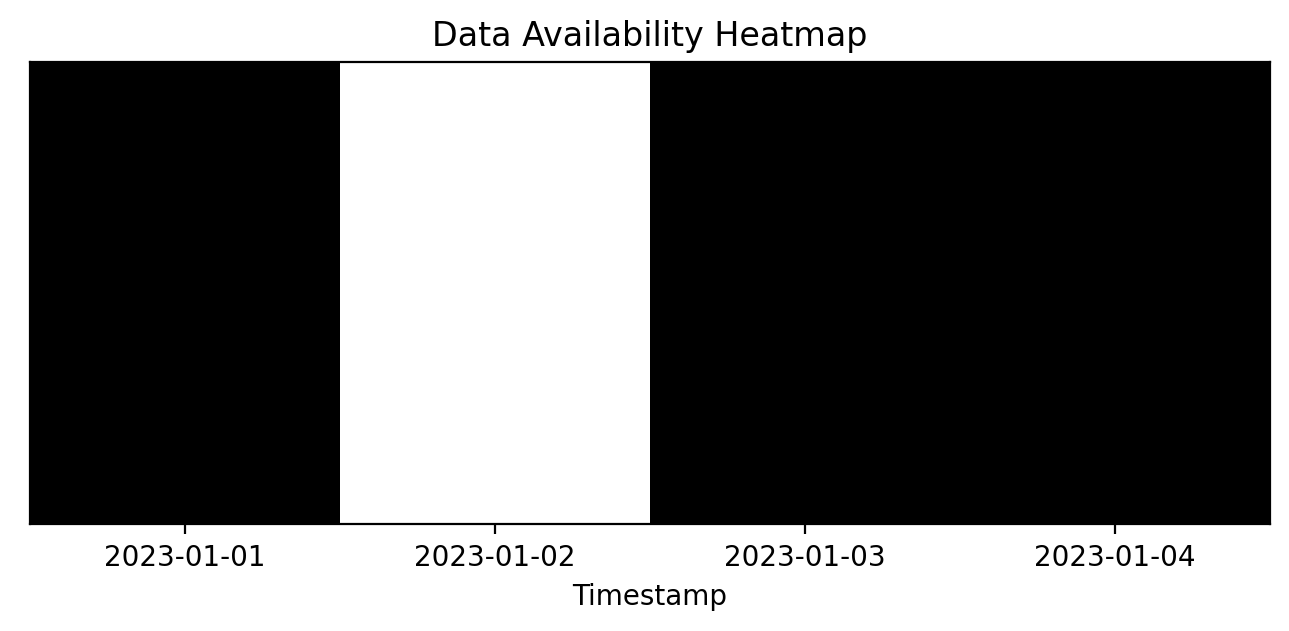

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with timestamp and binary column
data = {
    'Timestamp': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'],
    'Binary': [1, 0, 1, 1]
}

df = pd.DataFrame(data)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Convert 'Timestamp' column to datetime type

# Create a binary matrix to represent data availability
binary_matrix = df['Binary'].values.reshape(1, -1)

print(binary_matrix)
# Create the heatmap
plt.figure(figsize=(8, 3))  # Set the size of the plot
plt.imshow(binary_matrix, cmap='binary', aspect='auto')

# Customize the axis labels
plt.xlabel('Timestamp')
plt.xticks(ticks=range(len(df)), labels=df['Timestamp'].dt.date)
plt.yticks([])

plt.title('Data Availability Heatmap')  # Set the title of the plot

plt.show()  # Show the plot